# CASE STUDY-TEXT MINING
# ONLINE JOB POSTINGS

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#from  xgboost import XGBClassifier

from sklearn.cluster import KMeans
from apyori import apriori
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from bs4 import BeautifulSoup

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

import pickle

from tqdm import tqdm
import os

# Importing Gensim
import gensim
from gensim import corpora

from textblob import Word

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anubh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Importing Data

In [182]:
job=pd.read_csv('data job posts.csv')

In [183]:
job

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18996,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,"Dec 28, 2015",Senior Creative UX/ UI Designer,Technolinguistics NGO,NaN,Full-time,NaN,NaN,NaN,Long-term,...,Competitive,"To apply for this position, please send your\n...",29 December 2015,28 January 2016,NaN,As a company Technolinguistics has a mandate t...,NaN,2015,12,False
18997,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Category Development Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18998,"""Coca-Cola Hellenic Bottling Company Armenia"" ...","Dec 30, 2015",Operational Marketing Manager,"""Coca-Cola Hellenic Bottling Company Armenia"" ...",NaN,Full-time,All interested professionals.,NaN,ASAP,Long-term with a probation period of 3 months.,...,NaN,All interested candidates are kindly requested...,30 December 2015,20 January 2016,NaN,NaN,NaN,2015,12,False
18999,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,"Dec 30, 2015",Head of Online Sales Department,San Lazzaro LLC,NaN,NaN,NaN,NaN,NaN,Long-term,...,Highly competitive,Interested candidates can send their CVs to:\n...,30 December 2015,29 January 2016,NaN,San Lazzaro LLC works with several internation...,NaN,2015,12,False


In [184]:
*,

In [185]:
job_trend

,Year,Title,RequiredQual,jobpost,Company
0,2004,Chief Financial Officer,"To perform this job successfully, an\nindividu...",AMERIA Investment Consulting Company\nJOB TITL...,AMERIA Investment Consulting Company
1,2004,Full-time Community Connections Intern (paid i...,- Bachelor's Degree; Master's is preferred;\n-...,International Research & Exchanges Board (IREX...,International Research & Exchanges Board (IREX)
2,2004,Country Coordinator,"- Degree in environmentally related field, or ...",Caucasus Environmental NGO Network (CENN)\nJOB...,Caucasus Environmental NGO Network (CENN)
3,2004,BCC Specialist,"- Advanced degree in public health, social sci...",Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,Manoff Group
4,2004,Software Developer,- University degree; economical background is ...,Yerevan Brandy Company\nJOB TITLE: Software D...,Yerevan Brandy Company
...,...,...,...,...,...
18996,2015,Senior Creative UX/ UI Designer,- At least 5 years of experience in Interface/...,Technolinguistics NGO\n\n\nTITLE: Senior Crea...,Technolinguistics NGO
18997,2015,Category Development Manager,"- University degree, ideally business related;...","""Coca-Cola Hellenic Bottling Company Armenia"" ...","""Coca-Cola Hellenic Bottling Company Armenia"" ..."
18998,2015,Operational Marketing Manager,"- Degree in Business, Marketing or a related f...","""Coca-Cola Hellenic Bottling Company Armenia"" ...","""Coca-Cola Hellenic Bottling Company Armenia"" ..."
18999,2015,Head of Online Sales Department,- At least 1 year of experience in online sale...,San Lazzaro LLC\n\n\nTITLE: Head of Online ...,San Lazzaro LLC


## Data Processing

### Creating user defined functions for clean the text and pre-process the data

In [186]:
#Abbrevations and Words correction
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = re.sub(r' +', ' ', text)
    text = re.sub(r"[-()\"#/@;:{}`+=~|.!?,'0-9]", "", text)
    return(text)

In [190]:
job_trend['Title']=job_trend['Title'].astype('str')
job_trend['Title'] = job_trend['Title'].apply(clean_text)


C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [191]:
job_trend['RequiredQual']=job_trend['RequiredQual'].astype('str')
job_trend['RequiredQual'] = job_trend['RequiredQual'].apply(clean_text)

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [192]:
job_trend['jobpost']=job_trend['jobpost'].astype('str')
job_trend['jobpost'] = job_trend['jobpost'].apply(clean_text)

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [193]:
job_trend['Company']=job_trend['Company'].astype('str')
job_trend['Company'] = job_trend['Company'].apply(clean_text)

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [194]:
job_trend

,Year,Title,RequiredQual,jobpost,Company
0,2004,chief financial officer,to perform this job successfully an\nindividua...,ameria investment consulting company\njob titl...,ameria investment consulting company
1,2004,fulltime community connections intern paid int...,bachelors degree masters is preferred\n excel...,international research & exchanges board irex\...,international research & exchanges board irex
2,2004,country coordinator,degree in environmentally related field or y...,caucasus environmental ngo network cenn\njob t...,caucasus environmental ngo network cenn
3,2004,bcc specialist,advanced degree in public health social scien...,manoff group\njob title bcc specialist\npositi...,manoff group
4,2004,software developer,university degree economical background is a ...,yerevan brandy company\njob title software dev...,yerevan brandy company
...,...,...,...,...,...
18996,2015,senior creative ux ui designer,at least years of experience in interface in...,technolinguistics ngo\n\n\ntitle senior creati...,technolinguistics ngo
18997,2015,category development manager,university degree ideally business related\n ...,cocacola hellenic bottling company armenia cjs...,cocacola hellenic bottling company armenia cjsc
18998,2015,operational marketing manager,degree in business marketing or a related fie...,cocacola hellenic bottling company armenia cjs...,cocacola hellenic bottling company armenia cjsc
18999,2015,head of online sales department,at least year of experience in online sales ...,san lazzaro llc\n\n\ntitle head of online sale...,san lazzaro llc


#### Tokenization

In [195]:
job_trend['Title'] = job_trend['Title'].apply(lambda x: nltk.tokenize.word_tokenize(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [196]:
job_trend['RequiredQual'] = job_trend['RequiredQual'].apply(lambda x: nltk.tokenize.word_tokenize(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [197]:
job_trend['jobpost'] = job_trend['jobpost'].apply(lambda x: nltk.tokenize.word_tokenize(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [198]:
job_trend['Company'] = job_trend['Company'].apply(lambda x: nltk.tokenize.word_tokenize(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Removing Stop words

In [199]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [200]:
def stop_word(x) :
    clean_tokens = []
    for i in x:
        if i not in stopwords.words("english") and i != "":
            clean_tokens.append(i)
    return clean_tokens



In [201]:
job_trend['Title'] = job_trend['Title'].apply(stop_word)
job_trend['Title']

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                              [chief, financial, officer]
1        [fulltime, community, connections, intern, pai...
2                                   [country, coordinator]
3                                        [bcc, specialist]
4                                    [software, developer]
                               ...                        
18996                 [senior, creative, ux, ui, designer]
18997                     [category, development, manager]
18998                    [operational, marketing, manager]
18999                    [head, online, sales, department]
19000                          [lawyer, legal, department]
Name: Title, Length: 19001, dtype: object

In [202]:
job_trend['RequiredQual'] = job_trend['RequiredQual'].apply(stop_word)
job_trend['RequiredQual']

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        [perform, job, successfully, individual, must,...
1        [bachelors, degree, masters, preferred, excell...
2        [degree, environmentally, related, field, year...
3        [advanced, degree, public, health, social, sci...
4        [university, degree, economical, background, p...
                               ...                        
18996    [least, years, experience, interface, interact...
18997    [university, degree, ideally, business, relate...
18998    [degree, business, marketing, related, field, ...
18999    [least, year, experience, online, sales, manag...
19000    [higher, legal, education, masters, degree, pl...
Name: RequiredQual, Length: 19001, dtype: object

In [203]:
job_trend['jobpost'] = job_trend['jobpost'].apply(stop_word)
job_trend['jobpost']

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0        [ameria, investment, consulting, company, job,...
1        [international, research, &, exchanges, board,...
2        [caucasus, environmental, ngo, network, cenn, ...
3        [manoff, group, job, title, bcc, specialist, p...
4        [yerevan, brandy, company, job, title, softwar...
                               ...                        
18996    [technolinguistics, ngo, title, senior, creati...
18997    [cocacola, hellenic, bottling, company, armeni...
18998    [cocacola, hellenic, bottling, company, armeni...
18999    [san, lazzaro, llc, title, head, online, sales...
19000    [kamurj, uco, cjsc, title, lawyer, legal, depa...
Name: jobpost, Length: 19001, dtype: object

In [204]:
job_trend['Company'] = job_trend['Company'].apply(stop_word)
job_trend['Company']

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                [ameria, investment, consulting, company]
1        [international, research, &, exchanges, board,...
2            [caucasus, environmental, ngo, network, cenn]
3                                          [manoff, group]
4                               [yerevan, brandy, company]
                               ...                        
18996                             [technolinguistics, ngo]
18997    [cocacola, hellenic, bottling, company, armeni...
18998    [cocacola, hellenic, bottling, company, armeni...
18999                                  [san, lazzaro, llc]
19000                                  [kamurj, uco, cjsc]
Name: Company, Length: 19001, dtype: object

#### Lemmatization

In [205]:
job_trend['Title'] = job_trend['Title'].apply(lambda x: [Word(word).lemmatize() for word in x])
job_trend['Title'] = job_trend['Title'].apply(lambda x: ' '.join(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
job_trend['RequiredQual'] = job_trend['RequiredQual'].apply(lambda x: [Word(word).lemmatize() for word in x])
job_trend['RequiredQual'] = job_trend['RequiredQual'].apply(lambda x: ' '.join(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
job_trend['jobpost'] = job_trend['jobpost'].apply(lambda x: [Word(word).lemmatize() for word in x])
job_trend['jobpost'] = job_trend['jobpost'].apply(lambda x: ' '.join(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [208]:
job_trend['Company'] = job_trend['Company'].apply(lambda x: [Word(word).lemmatize() for word in x])
job_trend['Company'] = job_trend['Company'].apply(lambda x: ' '.join(x))

C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\anubh\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [209]:
job_trend

,Year,Title,RequiredQual,jobpost,Company
0,2004,chief financial officer,perform job successfully individual must able ...,ameria investment consulting company job title...,ameria investment consulting company
1,2004,fulltime community connection intern paid inte...,bachelor degree master preferred excellent ski...,international research & exchange board irex t...,international research & exchange board irex
2,2004,country coordinator,degree environmentally related field year rele...,caucasus environmental ngo network cenn job ti...,caucasus environmental ngo network cenn
3,2004,bcc specialist,advanced degree public health social science c...,manoff group job title bcc specialist position...,manoff group
4,2004,software developer,university degree economical background plus e...,yerevan brandy company job title software deve...,yerevan brandy company
...,...,...,...,...,...
18996,2015,senior creative ux ui designer,least year experience interface interaction de...,technolinguistics ngo title senior creative ux...,technolinguistics ngo
18997,2015,category development manager,university degree ideally business related com...,cocacola hellenic bottling company armenia cjs...,cocacola hellenic bottling company armenia cjsc
18998,2015,operational marketing manager,degree business marketing related field equiva...,cocacola hellenic bottling company armenia cjs...,cocacola hellenic bottling company armenia cjsc
18999,2015,head online sale department,least year experience online sale management r...,san lazzaro llc title head online sale departm...,san lazzaro llc


## Job Nature and Company Profiles

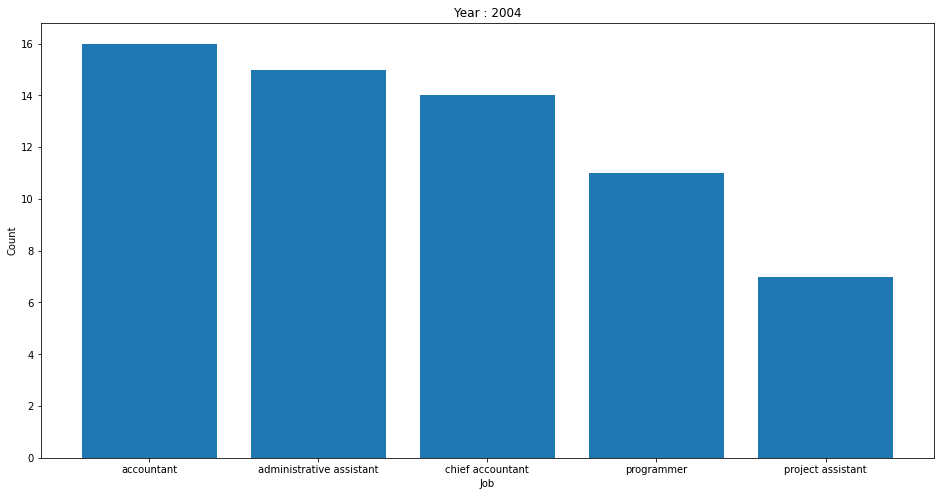

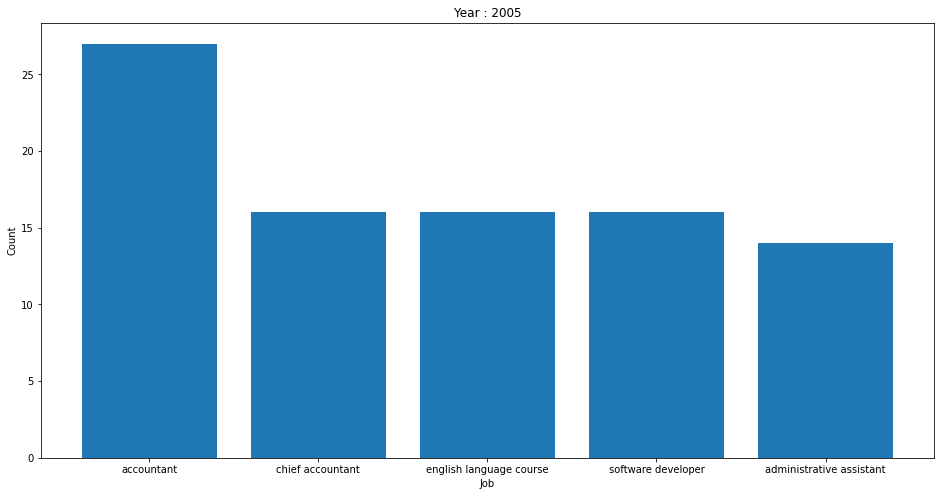

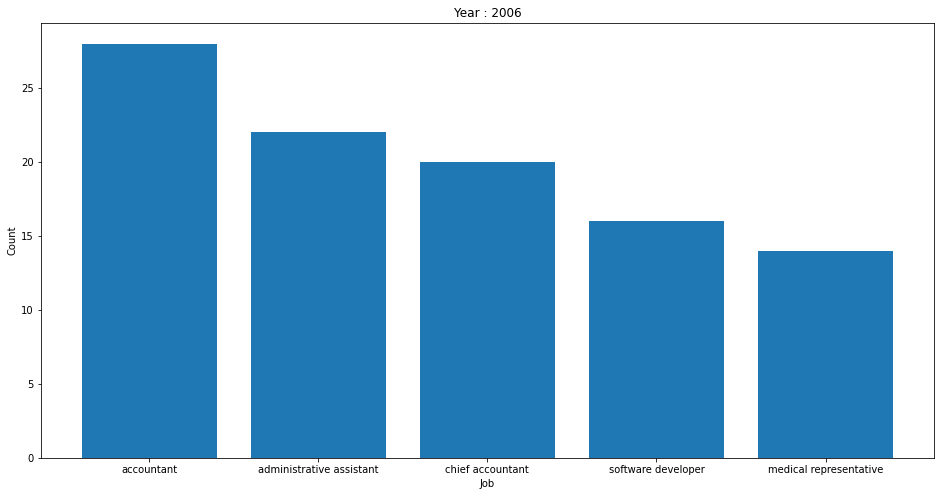

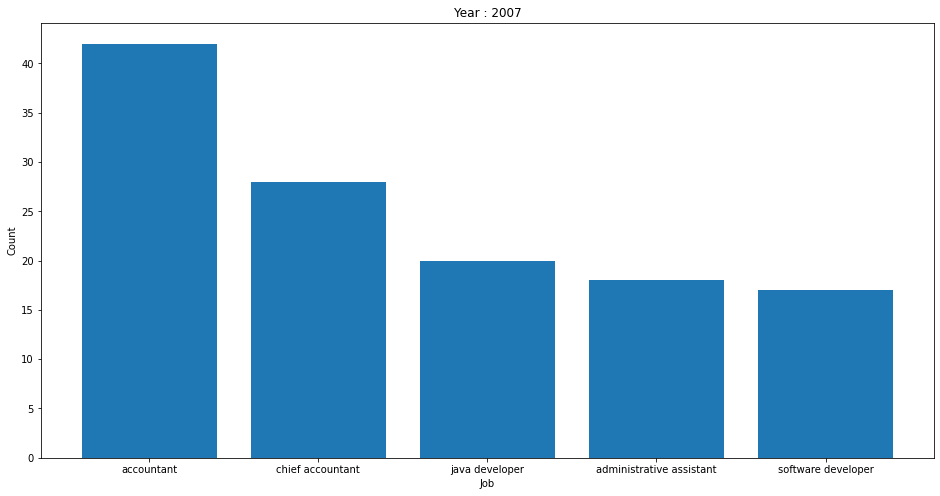

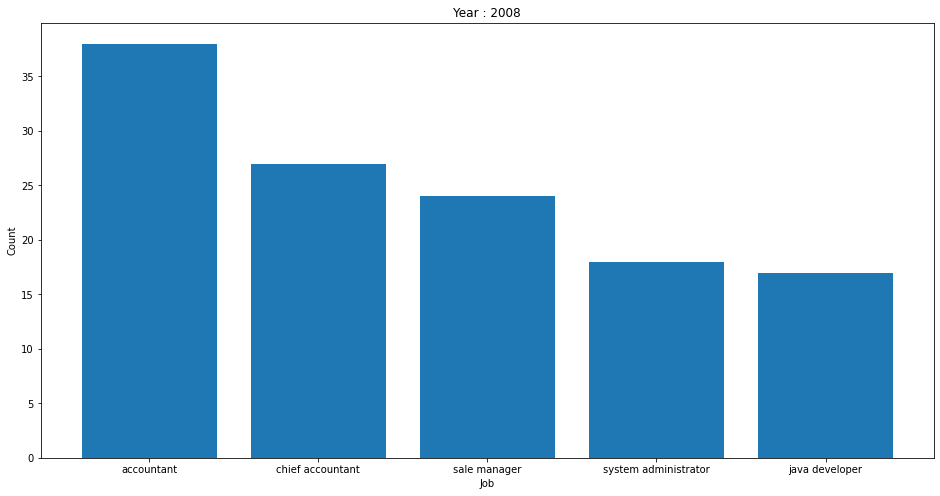

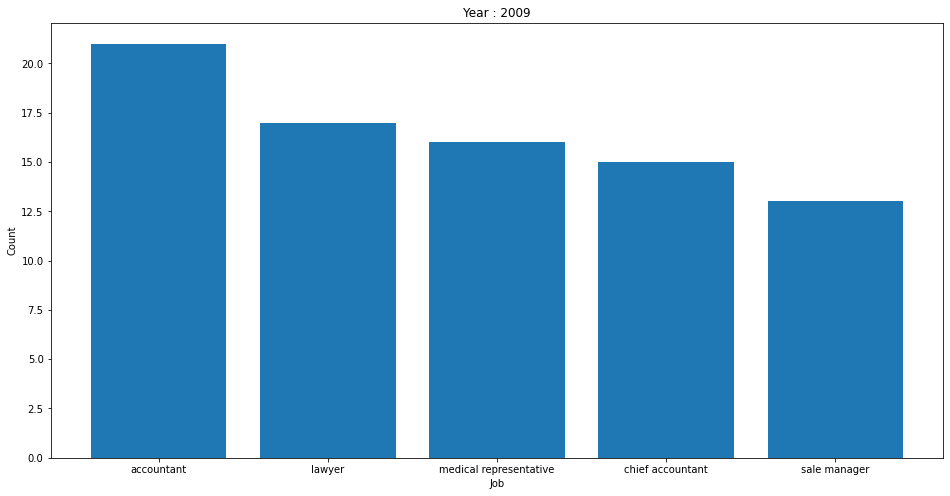

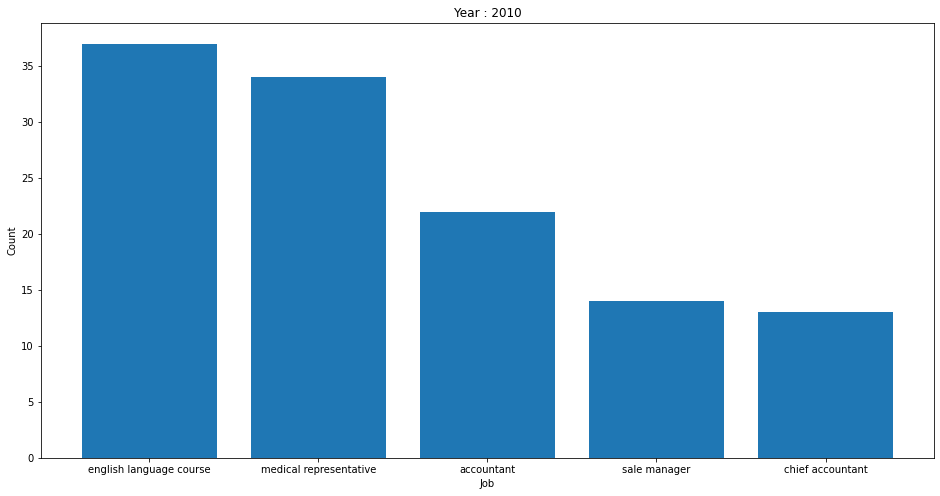

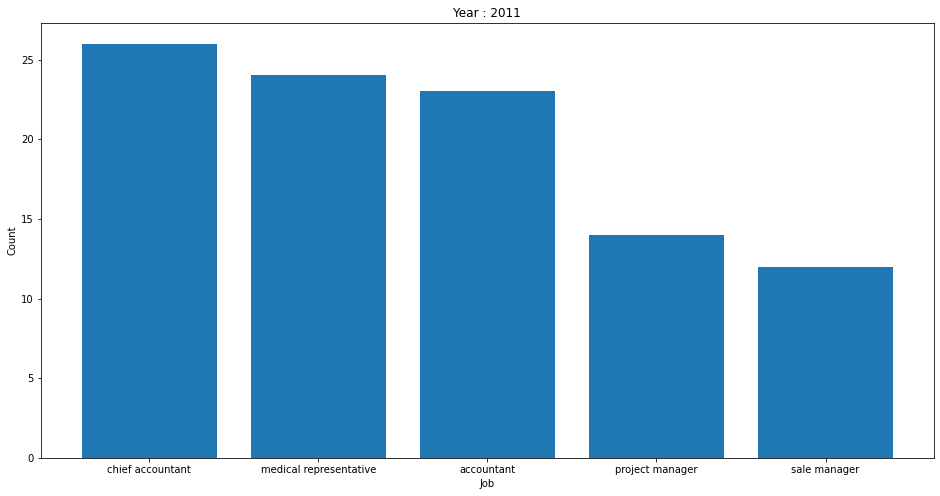

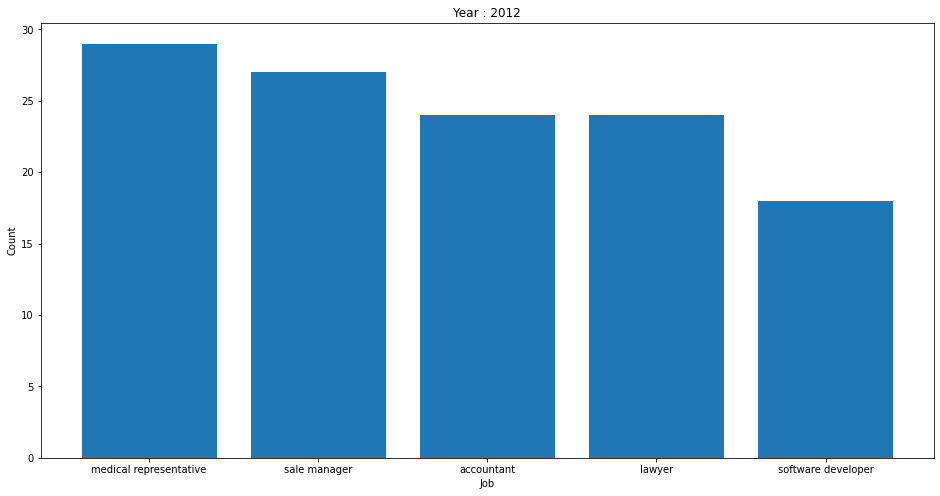

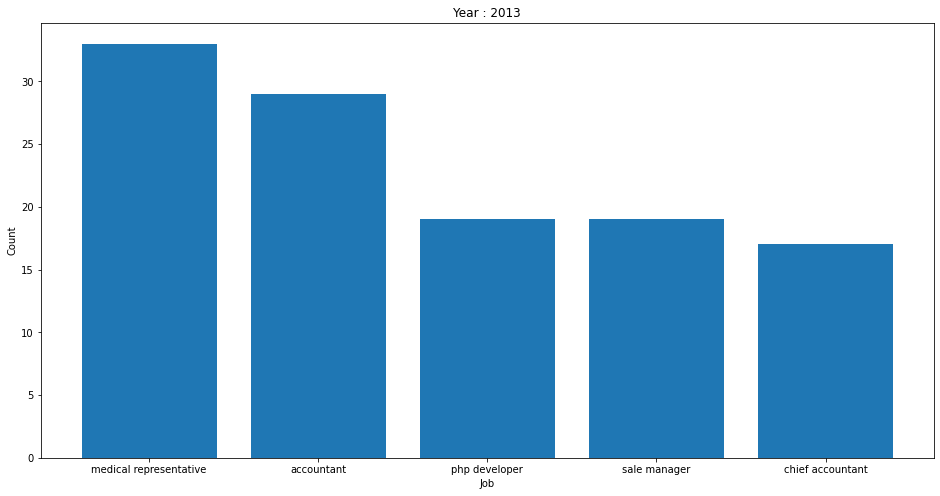

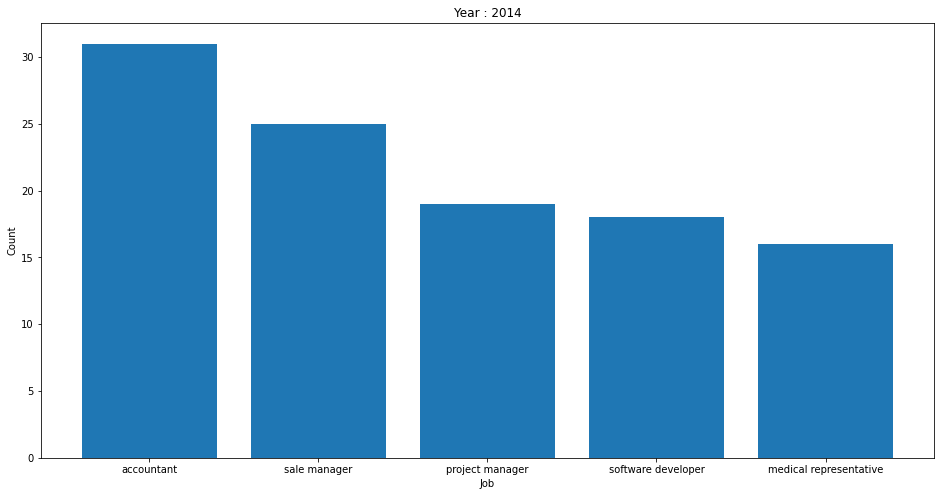

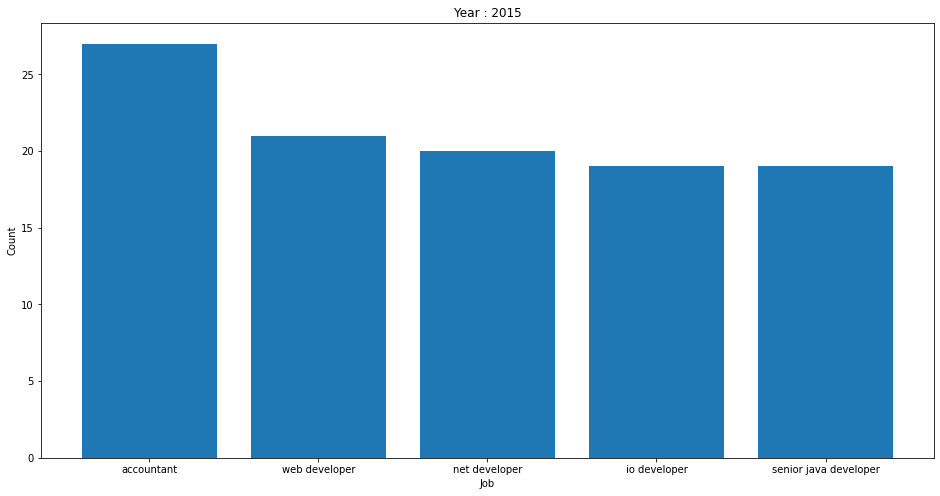

In [158]:
jobs_data = job_trend.groupby(by = ['Year','Title']).size().reset_index()
jobs_data.columns = ["Year", "Title", "cnt"]
jobs_data = jobs_data.sort_values(by = ['Year', 'cnt'], ascending = False)
# jobs_data = jobs_data.groupby('Year')
for y in range(2004, 2016):
    df = jobs_data[jobs_data['Year'] == y].head()
    plt.figure(figsize = (16, 8))
    plt.bar(df['Title'], df['cnt'])
    plt.title("Year : " + str(y))
    plt.xlabel("Job")
    plt.ylabel("Count")

In [170]:
for y in range(2004, 2016):
    df = jobs_data[jobs_data['Year'] == y]
    X = df['Title']
    ### Topic Modeling using gensim (Latent Dirichlet allocation)
    X_tokens = [doc.split() for doc in X]
    dictionary = corpora.Dictionary(X_tokens)
#     print(dictionary)
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in X_tokens]

    # Creating the object for LDA model using gensim library
    Lda = gensim.models.ldamodel.LdaModel

    # Running and Trainign LDA model on the document term matrix.
    ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=1)
    print("Year {}".format(y))
    for index, topic in ldamodel.show_topics(formatted=False, num_words= 5, num_topics=3):
        print('Topic: {} \nWords: {}'.format(index, [w[0] for w in topic]))    

Year 2004
Topic: 0 
Words: ['specialist', 'officer', 'engineer', 'assistant', 'teacher']
Topic: 1 
Words: ['manager', 'program', 'senior', 'coordinator', 'engineer']
Topic: 2 
Words: ['assistant', 'developer', 'director', 'project', 'engineer']
Year 2005
Topic: 0 
Words: ['specialist', 'head', 'assistant', 'department', 'developer']
Topic: 1 
Words: ['specialist', 'senior', 'manager', 'officer', 'developer']
Topic: 2 
Words: ['manager', 'assistant', 'engineer', 'development', 'sale']
Year 2006
Topic: 0 
Words: ['director', 'administrator', 'engineer', 'coordinator', 'senior']
Topic: 1 
Words: ['assistant', 'engineer', 'specialist', 'manager', 'officer']
Topic: 2 
Words: ['manager', 'specialist', 'developer', 'software', 'officer']
Year 2007
Topic: 0 
Words: ['specialist', 'manager', 'officer', 'coordinator', 'project']
Topic: 1 
Words: ['specialist', 'assistant', 'department', 'manager', 'director']
Topic: 2 
Words: ['manager', 'developer', 'engineer', 'senior', 'software']
Year 2008
T

**Accountants being in top demand over the years but the trend is moving more towards IT and software engineering jobs in recent years**

## Desired Characteristics and Skill-Sets

In [141]:
job['RequiredQual']

0        To perform this job successfully, an\nindividu...
1        - Bachelor's Degree; Master's is preferred;\n-...
2        - Degree in environmentally related field, or ...
3        - Advanced degree in public health, social sci...
4        - University degree; economical background is ...
                               ...                        
18996    - At least 5 years of experience in Interface/...
18997    - University degree, ideally business related;...
18998    - Degree in Business, Marketing or a related f...
18999    - At least 1 year of experience in online sale...
19000    - Higher legal education; Master's degree is a...
Name: RequiredQual, Length: 19001, dtype: object

In [179]:
def apply_clustering(X):
    ### Vectorization
    tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
    X_tfidf = tfidf_vect.fit_transform(X)
    ### Clustering
    model = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=1,random_state=5)
    res = model.fit(X_tfidf)

    sse_err = []
    cluster_centers = np.array(res.cluster_centers_)
    sorted_vals = [res.cluster_centers_[i].argsort() for i in range(0,np.shape(res.cluster_centers_)[0])]

    vocab = np.array(tfidf_vect.get_feature_names())

    words=set()
    for i in range(len(res.cluster_centers_)):
        print("Cluster {}".format(i))
        print(vocab[sorted_vals[i][-10:]])


In [180]:
for y in range(2004, 2016):
    print("Year : {}".format(y))
    df = job_trend[job_trend['Year'] == y]
    apply_clustering(df['RequiredQual'])
    print("=" * 25)

Year : 2004
Cluster 0
['expert' 'expertise' 'explorer' 'express' 'extended' 'extensive'
 'extensively' 'familiar' 'yerevan' 'nan']
Cluster 1
['computer' 'ability' 'english' 'work' 'russian' 'knowledge' 'armenian'
 'experience' 'excellent' 'skill']
Cluster 2
['ability' 'desirable' 'degree' 'language' 'good' 'english' 'work' 'year'
 'knowledge' 'experience']
Year : 2005
Cluster 0
['explorer' 'express' 'extensive' 'extensively' 'external' 'extra'
 'extreme' 'expatriate' 'yerevan' 'nan']
Cluster 1
['russian' 'ability' 'good' 'armenian' 'experience' 'language' 'work'
 'excellent' 'knowledge' 'skill']
Cluster 2
['least' 'c' 'system' 'software' 'work' 'ability' 'year' 'development'
 'knowledge' 'experience']
Year : 2006
Cluster 0
['language' 'degree' 'year' 'ability' 'accounting' 'skill' 'nan' 'work'
 'knowledge' 'experience']
Cluster 1
['education' 'higher' 'armenian' 'russian' 'work' 'good' 'language'
 'excellent' 'skill' 'knowledge']
Cluster 2
['programming' 'year' 'web' 'work' 'server' 'd

**Desired skills are mostly clustered in management and executive roles, IT software roles or accounting and langauge based skillset. This skills have considerably moved from accounting and management heavy roles to software/IT skills**

## IT Job Classification

### Classification

In [214]:
# define X and y
X = job_trend.jobpost + " " + job_trend.Company
y = job.IT
# split the new DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14250,)
(4751,)
(14250,)
(4751,)


### Vectorization (count, tfidf) for both train & test

In [215]:
#Train
count_vect = CountVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             lowercase = True,
                             encoding='latin-1' , 
                             max_features=1000)
X_train_count = count_vect.fit_transform(X_train)

tfidf_vect = TfidfVectorizer(analyzer='word', 
                             token_pattern=r'\w{1,}', 
                             ngram_range=(1, 1 ), 
                             min_df=5, 
                             encoding='latin-1' , 
                             lowercase = True,
                             max_features=1000)
X_train_tfidf = tfidf_vect.fit_transform(X_train)

#Test
X_test_count = count_vect.transform(X_test)
X_test_tfidf = tfidf_vect.transform(X_test)


### Create user defined function for train Classification the models

In [216]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
        
    print(metrics.classification_report(valid_y, predictions))
    
    
    return metrics.accuracy_score(predictions, valid_y)

### Building different models with different vectors

In [219]:
#Naive Bayes
# Naive Bayes on Count Vectors and TF-IDF
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("NB  for Count Vectors: ", accuracy_L1)

              precision    recall  f1-score   support

       False       0.95      0.93      0.94      3854
        True       0.73      0.80      0.76       897

    accuracy                           0.91      4751
   macro avg       0.84      0.86      0.85      4751
weighted avg       0.91      0.91      0.91      4751

NB  for Count Vectors:  0.9071774363291939


In [220]:
# Naive Bayes on Word Level TF IDF Vectors
accuracy_L1 = train_model(naive_bayes.MultinomialNB(), X_train_count, y_train, X_test_count, y_test)
print("NB  for WordLevel TF-IDF: ", accuracy_L1)

              precision    recall  f1-score   support

       False       0.97      0.89      0.93      3854
        True       0.65      0.90      0.75       897

    accuracy                           0.89      4751
   macro avg       0.81      0.89      0.84      4751
weighted avg       0.91      0.89      0.89      4751

NB  for WordLevel TF-IDF:  0.888234055988213


In [223]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("LR  for Count Vectors: ", accuracy_L1)

# Logistic Regression on Word Level TF IDF Vectors
accuracy_L1 = train_model(LogisticRegression(), X_train_count, y_train, X_test_count, y_test)
print("LR  for WordLevel TF-IDF: ", accuracy_L1)


              precision    recall  f1-score   support

       False       0.95      0.97      0.96      3854
        True       0.86      0.78      0.82       897

    accuracy                           0.93      4751
   macro avg       0.90      0.87      0.89      4751
weighted avg       0.93      0.93      0.93      4751

LR  for Count Vectors:  0.9336981688065671
              precision    recall  f1-score   support

       False       0.96      0.96      0.96      3854
        True       0.82      0.82      0.82       897

    accuracy                           0.93      4751
   macro avg       0.89      0.89      0.89      4751
weighted avg       0.93      0.93      0.93      4751

LR  for WordLevel TF-IDF:  0.9328562407914124


C:\Users\anubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [224]:
#Linear SVC
# Linear SVC on Count Vectors and TF-IDF
accuracy_L1 = train_model(svm.LinearSVC(), X_train_tfidf, y_train, X_test_tfidf, y_test)
print("SVC  for Count Vectors: ", accuracy_L1)

# Linear SVC on Word Level TF IDF Vectors
accuracy_L1 = train_model(svm.LinearSVC(), X_train_count, y_train, X_test_count, y_test)
print("SVC  for WordLevel TF-IDF: ", accuracy_L1)

              precision    recall  f1-score   support

       False       0.96      0.97      0.96      3854
        True       0.88      0.81      0.84       897

    accuracy                           0.94      4751
   macro avg       0.92      0.89      0.90      4751
weighted avg       0.94      0.94      0.94      4751

SVC  for Count Vectors:  0.9425384129656914
              precision    recall  f1-score   support

       False       0.96      0.95      0.96      3854
        True       0.80      0.84      0.82       897

    accuracy                           0.93      4751
   macro avg       0.88      0.90      0.89      4751
weighted avg       0.93      0.93      0.93      4751

SVC  for WordLevel TF-IDF:  0.9294885287307935


C:\Users\anubh\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Similarity of Jobs

### Word2Vec

In [226]:
def AvgWord2VecRep(Text):

    '''train my own Word2Vec model using our processed reviews text corpus and compute average word2vec for each review by averaging vectors of all words in that review'''
     #Preparing our train text for gensim model 
    list_of_sentance = []
    for sentance in Text:
        list_of_sentance.append(sentance.split())

    #Building Word2Vec Model using our own text corpus  
    w2v_model=Word2Vec(list_of_sentance,min_count=4,size=100, workers=4)
    w2v_words = list(w2v_model.wv.vocab)

    #Averaging word vectors of a sentence
    sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_of_sentance): # for each review/sentence
        sent_vec = np.zeros(100) # as word vectors are of zero length 100
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    sent_vectors = np.array(sent_vectors)


    return sent_vectors
    

In [227]:
sent_vectors = AvgWord2VecRep(job_trend.jobpost)

100%|███████████████████████████████████████████████████████████████████████████| 19001/19001 [01:39<00:00, 191.16it/s]


In [269]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_postings(job_idx):
    similarity_vec = cosine_similarity(sent_vectors[job_idx].reshape(1,-1), sent_vectors)    
    return similarity_vec, np.argsort(similarity_vec)[0][-6:-1]

In [282]:
CURR_JOBPOST_IDX = 45 # different index could be entered to get top 5 similar jobposts
print("CURRENT JOBPOST : ", job_trend.jobpost[CURR_JOBPOST_IDX])
print("TOP 5 SIMILAR JOB POSTS")
print('*'*120)
similarity_vec, idxs = find_similar_postings(CURR_JOBPOST_IDX)
ordered_idxs = idxs[::-1]
for idx in ordered_idxs:
    print("Index : {}".format(idx))
    print("Score : {}".format(similarity_vec[0][idx]))
    print("Similar Jobpost : ", job_trend.jobpost[idx])

CURRENT JOBPOST :  military institute job title teacher information technology position location yerevan armenia job description military institute looking teacher information technology required qualification university degree working experience least year knowledge window msoffice programming v basic remuneration dram application procedure send resume man_mas connect masis manukyan chief department information technology military institute shopron sr yerevan armenia additional information call candidate asked pas interview please clearly mention application letter learned job opportunity career center mention url website wwwcareercenteram thanks application deadline february place free posting job career related opportunity organization careercenteram website email u atmailbox
TOP 5 SIMILAR JOB POSTS
************************************************************************************************************************
Index : 35
Score : 0.9274957860235901
Similar Jobpost :  cit ltd 